In [97]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
print("IMPORT: Success")

IMPORT: Success


In [98]:
tit = pd.read_csv("Titanic.csv")

#### Столбцы датасета:
- PassengerId — ID пассажира
- Survived — Флаг выживания (0 = Нет, 1 = Да)
- Pclass — Класс билета 
- Name — Имя пассажира
- Sex — Пол
- Age — Возраст
- SibSp — Количество братьев, сестер, супругов на борту
- Parch — Количество родителей, детей на борту
- Ticket — Номер билета
- Fare — Стоимость билета
- Cabin — Номер каюты
- Embarked — Порт посадки 

In [99]:
print(f"Размеры датасета: {tit.shape}\n")
print("Типы данных: ")
print(tit.dtypes)
print("\nПропуски: ")
print(tit.isnull().sum())

Размеры датасета: (891, 12)

Типы данных: 
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Пропуски: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [100]:
tit.head()  # глянем на датасет

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
# Сделаем имена колонок логичнее 
tit = tit.rename(
    columns={
        "PassengerID": "ID",
        "Pclass": "TicketClass",
        "SibSp": "Siblings",
        "Parch": "ParentsOrChildren",
        "Fare": "TicketCost",
    }
)

## Баловство с графиками 
EDA начинается <a href="#заполнение-пропусков">здесь</a>

In [102]:
a = (
    tit.groupby(["Sex"], as_index=False)
    .agg({"Survived": "mean"})
    .sort_values("Survived")
)
print(a)

      Sex  Survived
1    male  0.188908
0  female  0.742038


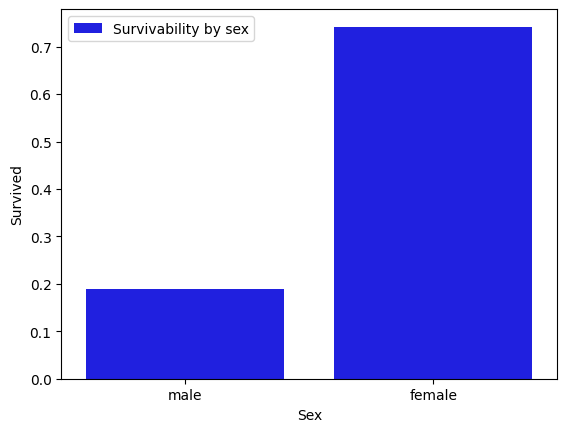

In [103]:
ax = sns.barplot(data=a, y="Survived", x="Sex", color="Blue",label="Survivability by sex")

In [104]:
pd.crosstab(
    tit["Sex"], tit["Survived"], margins=True
)  # Смотрим количество выживших (и не очень) по обоим полам в одной таблиице

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


<Axes: xlabel='Age'>

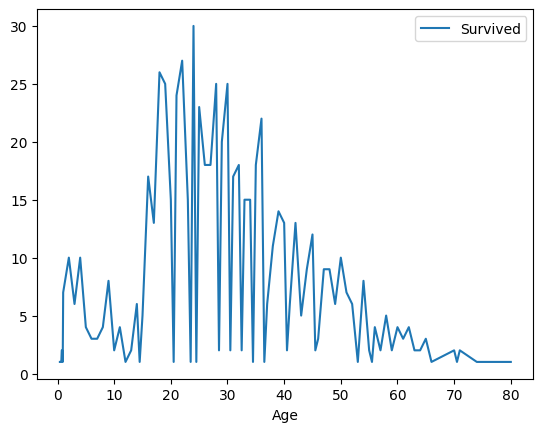

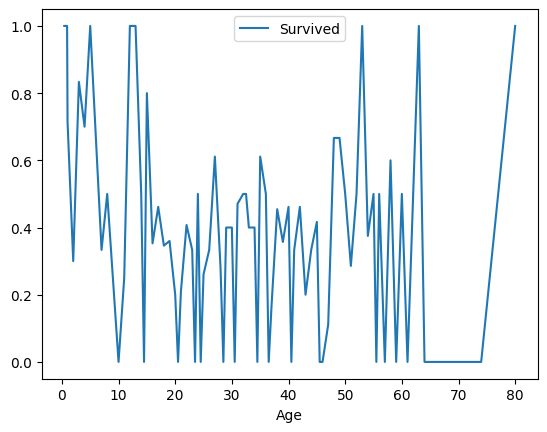

In [105]:
# Количество выживших по возрасту
b = tit.groupby(["Age"], as_index=False).agg({"Survived": "count"})
# Средняя выживаемость по возрасту
b1 = tit.groupby(["Age"], as_index=False).agg({"Survived": "mean"})
b.plot(y="Survived", x="Age")
b1.plot(y="Survived", x="Age")

## Заполнение пропусков
В качестве метода заполнения будем использовать backward fill + forward fill
т.к., я полагаю, заполнение средним / медианным / модальным значением создаст ненужный выброс в данных, что нам не шибко надо

In [106]:
tit = tit.bfill()
tit = tit.ffill()
print(f"Всего пропусков осталось: {sum(tit.isnull().sum())}")

Всего пропусков осталось: 0


### Гипотеза 0: Выживаемость зависит от пола и возраста

In [107]:
women = tit.loc[tit["Sex"] == "female"]  # Данные всех женщин
men = tit.loc[tit["Sex"] == "male"]  # Данные всех мужчин

# Группируем женщин по возрасту
# Считаем среднюю выживаемость для каждой группы
# Сортируем результат по возрасту (для удобства)
# Сглаживаем график с помощью rolling (скользящее окно) ((размер скользящего онка - параметр window: int))
# Берём скользящее среднее с мопощью .mean()

# для взятия других скользящих использовать другие ф-ции (для медианного - .median(), с другими аналогично)
# сглаживать надо, т.к.
# нам не нужны конкретные данные о выживаемости конкретного возраста, а просто общая картина
women_survivability = (
    women.groupby(["Age"])
    .agg({"Survived": "mean"})
    .sort_values("Age")
    .rolling(window=5)
    .mean()
)

# Аналогично с мущинами
men_survivability = (
    men.groupby(["Age"])
    .agg({"Survived": "mean"})
    .sort_values("Age")
    .rolling(window=5)
    .mean()
)

[Text(0, -0.1, '-10%'),
 Text(0, 0.0, '0%'),
 Text(0, 0.1, '10%'),
 Text(0, 0.20000000000000004, '20%'),
 Text(0, 0.30000000000000004, '30%'),
 Text(0, 0.4, '40%'),
 Text(0, 0.5000000000000001, '50%'),
 Text(0, 0.6000000000000001, '60%'),
 Text(0, 0.7000000000000001, '70%'),
 Text(0, 0.8, '80%')]

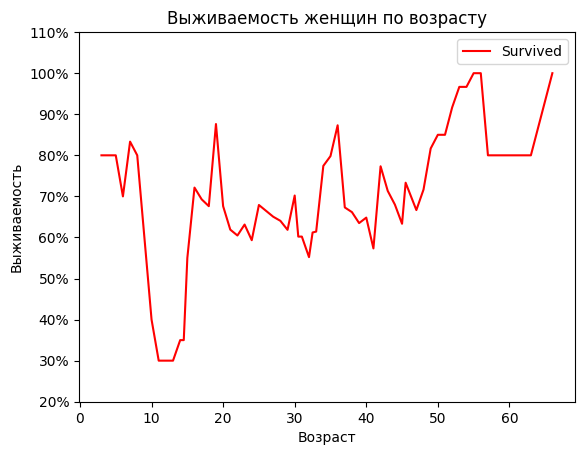

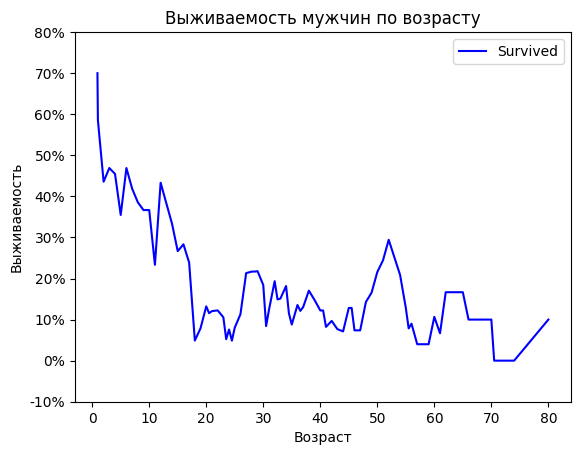

In [108]:
# Строим график женщин
ax = women_survivability.plot(
    color="red", title="Выживаемость женщин по возрасту", ylabel="Выживаемость", xlabel="Возраст"
)
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(["{:.0%}".format(n) for n in ax.get_yticks()])

# строим график мужчин
ax = men_survivability.plot(
    color="blue", title="Выживаемость мужчин по возрасту", ylabel="Выживаемость", xlabel="Возраст"
)
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(["{:.0%}".format(n) for n in ax.get_yticks()])

Выводы: 
 - Выживаемость зависит от пола (выживаемость мужчин ниже выживаемости женщин)
 - Выживаемость <b>мужчин</b> зависит от возраста, у женщин такой явной зависимости не наблюдается
> Неожиданно, что женщины подросткового возраста имеют самую низкую выживаемость <br>
Выживаемость мужчин предсказуема, кроме скачка в районе 50 лет. Возможно, это влияние других факторов (ранг или класс билета)

## Гипотеза 1: Выживаемость зависит от класса билета

C:\Users\User\AppData\Local\Temp\ipykernel_5704\1763394356.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(["{:.0%}".format(n) for n in ax.get_yticks()])


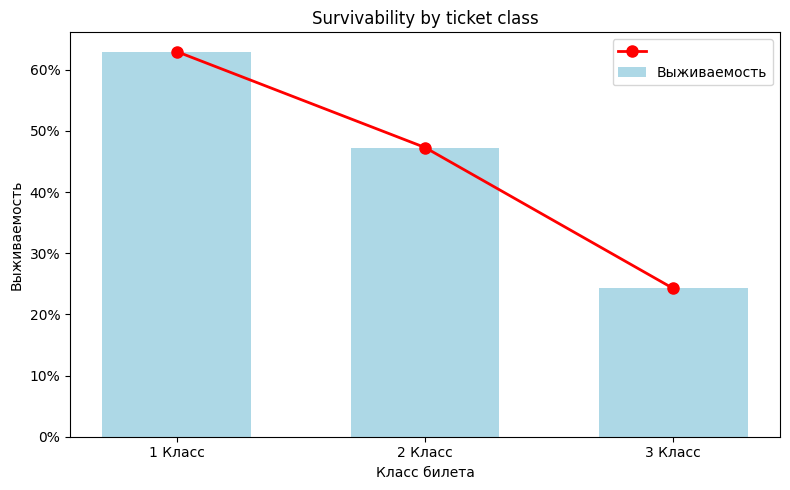

In [109]:
survivability_by_ticket_class = tit.groupby(['TicketClass']).agg({"Survived": 'mean'}).sort_values('TicketClass')

fig, ax = plt.subplots(figsize=(8, 5))

# Столбцы
bars = ax.bar(range(len(survivability_by_ticket_class)), 
              survivability_by_ticket_class['Survived'], 
              color='lightblue', width=0.6)

# Линия
line = ax.plot(range(len(survivability_by_ticket_class)), 
               survivability_by_ticket_class['Survived'], 
               color='red', marker='o', linewidth=2, markersize=8)

# Настройки графика
ax.set_title("Survivability by ticket class")
ax.set_ylabel("Выживаемость")
ax.set_xlabel("Класс билета")
ax.set_xticks(range(len(survivability_by_ticket_class)))
ax.set_xticklabels(['1 Класс', '2 Класс', '3 Класс'])
ax.set_yticklabels(["{:.0%}".format(n) for n in ax.get_yticks()])


ax.legend(['', 'Выживаемость'], loc='best')
plt.tight_layout()
plt.show()

<h>Зависимость (почти) линейная -> гипотезу можно считать подтверждённой</h>

## Гипотеза 2: Выживаемость зависит от наличия родственников на корабле 

Для проверки гипотезы создадим дополнительный столбец <br> <b>Has_Relativess</b>, в который запишем признак признак "есть ли родственники", и столбец <br> <b>Total_Relativess</b>, в который запишем общее количество родственников

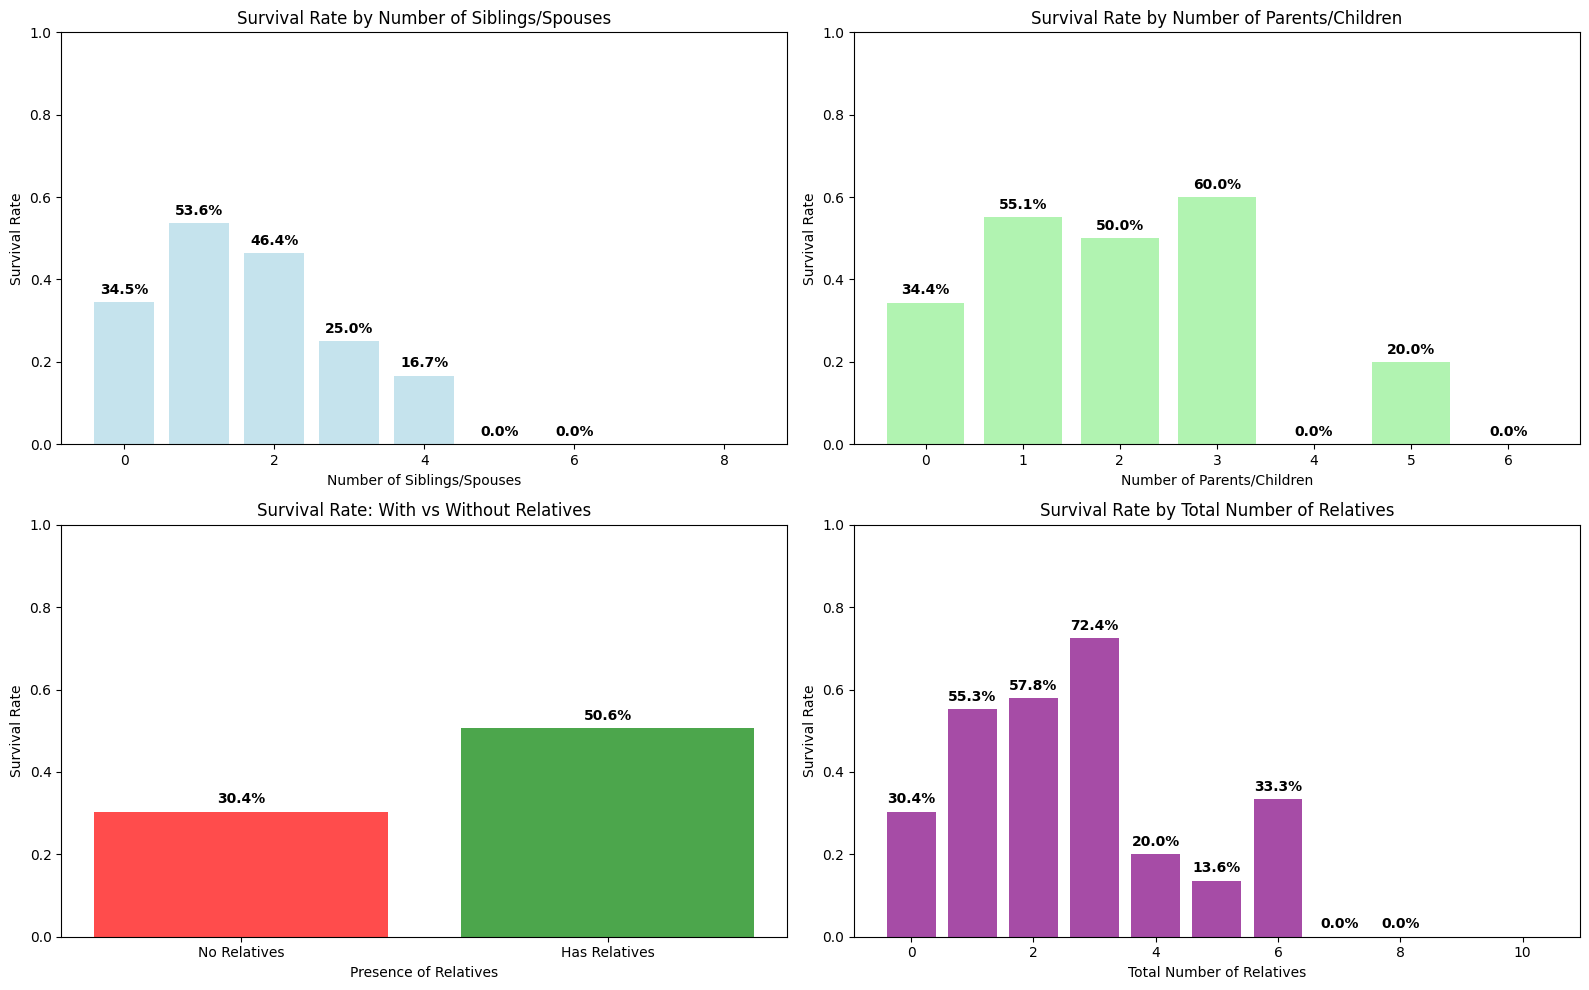

In [110]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

# График 1: Siblings/Spouses
siblings_survival = tit.groupby('Siblings')['Survived'].mean()
ax1.bar(siblings_survival.index, siblings_survival.values, color='lightblue', alpha=0.7)
ax1.set_title('Survival Rate by Number of Siblings/Spouses')
ax1.set_xlabel('Number of Siblings/Spouses')
ax1.set_ylabel('Survival Rate')
ax1.set_ylim(0, 1)

# График 2: Parents/Children
parch_survival = tit.groupby('ParentsOrChildren')['Survived'].mean()
ax2.bar(parch_survival.index, parch_survival.values, color='lightgreen', alpha=0.7)
ax2.set_title('Survival Rate by Number of Parents/Children')
ax2.set_xlabel('Number of Parents/Children')
ax2.set_ylabel('Survival Rate')
ax2.set_ylim(0, 1)

# График 3: С родственниками vs Без родственников
# Создаем признак "есть ли родственники"
tit['Has_Relatives'] = (tit['Siblings'] > 0) | (tit['ParentsOrChildren'] > 0)
relatives_survival = tit.groupby('Has_Relatives')['Survived'].mean()

# Переименовываем индексы для понятности
relatives_survival.index = ['No Relatives', 'Has Relatives']

bars3 = ax3.bar(relatives_survival.index, relatives_survival.values, 
                color=['red', 'green'], alpha=0.7)
ax3.set_title('Survival Rate: With vs Without Relatives')
ax3.set_xlabel('Presence of Relatives')
ax3.set_ylabel('Survival Rate')
ax3.set_ylim(0, 1)

# График 4: Общее количество родственников
tit['Total_Relatives'] = tit['Siblings'] + tit['ParentsOrChildren']
total_relatives_survival = tit.groupby('Total_Relatives')['Survived'].mean()

ax4.bar(total_relatives_survival.index, total_relatives_survival.values, 
        color='purple', alpha=0.7)
ax4.set_title('Survival Rate by Total Number of Relatives')
ax4.set_xlabel('Total Number of Relatives')
ax4.set_ylabel('Survival Rate')
ax4.set_ylim(0, 1)

# Добавляем проценты на все графики
for i, v in enumerate(siblings_survival):
    ax1.text(i, v + 0.02, f'{v:.1%}', ha='center', fontweight='bold')
for i, v in enumerate(parch_survival):
    ax2.text(i, v + 0.02, f'{v:.1%}', ha='center', fontweight='bold')
for i, v in enumerate(relatives_survival):
    ax3.text(i, v + 0.02, f'{v:.1%}', ha='center', fontweight='bold')
for i, v in enumerate(total_relatives_survival):
    ax4.text(i, v + 0.02, f'{v:.1%}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


Выводы:
 - Выживаемость в среднем зависит от <b>наличия</b> родственников на корабле
 - Выживаемость явно не зависит от <b>количества</b> родствеников

### Гипотеза 3: Столбцы датасета могут коррелировать между собой

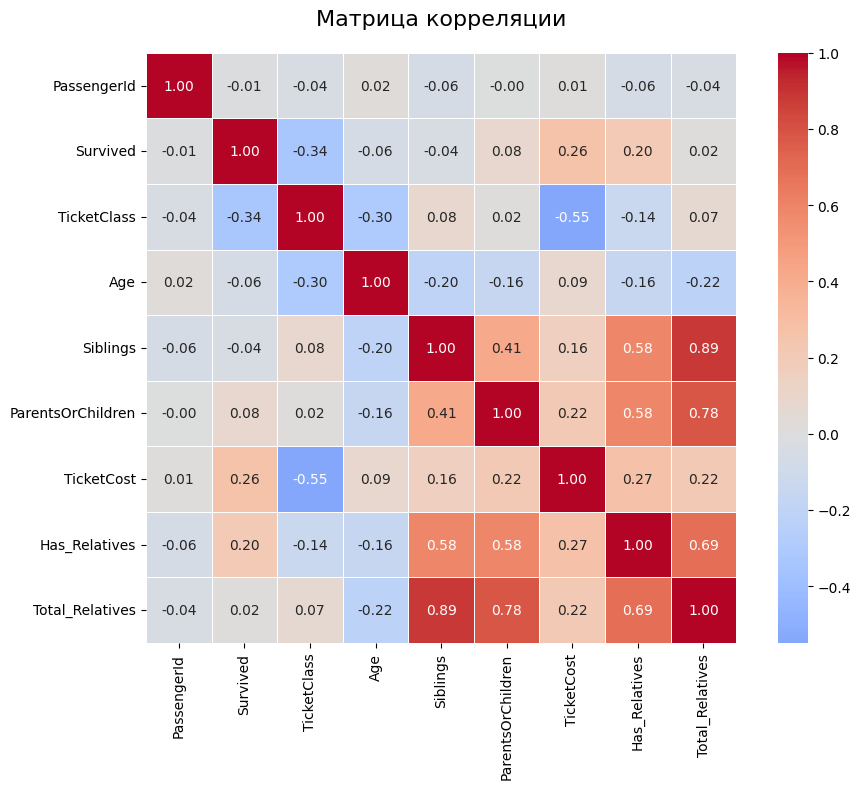

In [111]:
corr_matrix = tit.corr(numeric_only=True)

# Создаем тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True,        # Показывать значения в ячейках
            fmt='.2f',         # Формат чисел (2 знака после запятой)
            cmap='coolwarm',   # Цветовая схема
            center=0,          # Центр цветовой шкалы
            square=True,       # Квадратные ячейки
            linewidths=0.5)    # Ширина линий между ячейками

plt.title('Матрица корреляции', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

Выводы из матрицы корреляции:
 - Выживаемость немного (k: 0.26) коррелирует с ценой билета, классом билета (k: 0.33) и с наличием родственника (k: 0.20)
 - Класс билета хорошо коррелирует с ценой билета (k: -0.55)
 - Неожиданно: Класс билета коррелирует с возрастом (k: 0.37), а цена билета -  с наличием родственников (k: 0.27)



### Гипотеза 4: Выживаемость зависит от порта посадки
Для проверки гипотезы изменим датасет следующим образом:
С помощью метода _One-Hot Encoding_ создадим <br>
3 дополнительных бинарных столбца: 
 - Embarked_C
 - Embarked_S
 - Embarked_Q


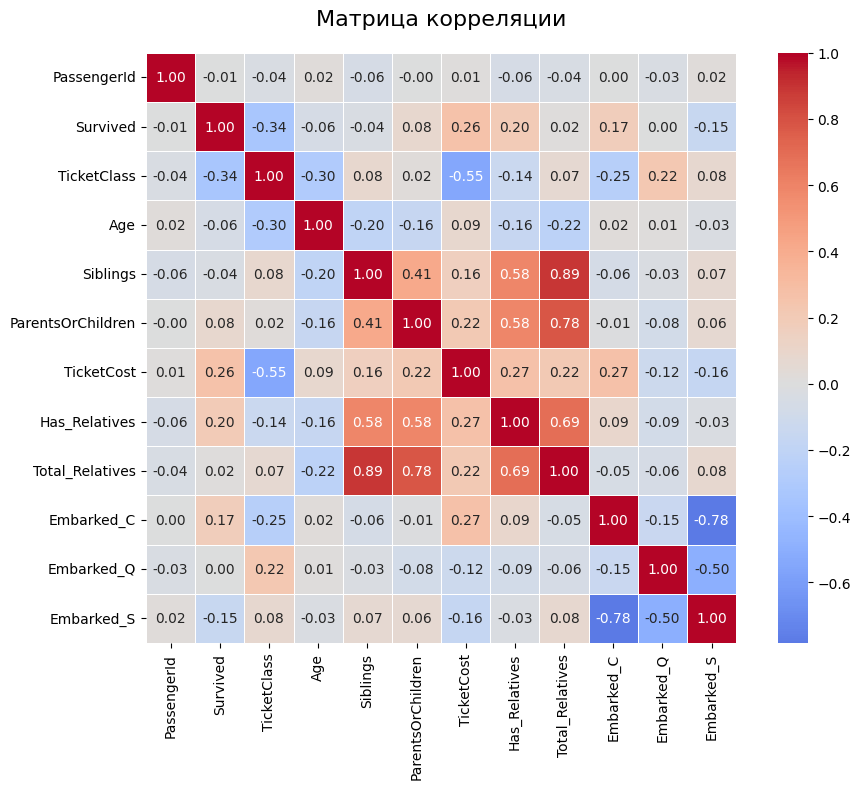

In [112]:
# создание доп столбцов
embarked_dummies = pd.get_dummies(tit['Embarked'], prefix='Embarked')
tit = pd.concat([tit, embarked_dummies], axis=1)

# Глянем на новую матрицу корреляций
corr_matrix = tit.corr(numeric_only=True)

# Создаем тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True,        # Показывать значения в ячейках
            fmt='.2f',         # Формат чисел (2 знака после запятой)
            cmap='coolwarm',   # Цветовая схема
            center=0,          # Центр цветовой шкалы
            square=True,       # Квадратные ячейки
            linewidths=0.5)    # Ширина линий между ячейками

plt.title('Матрица корреляции', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

Вывод:
 - Выживаемость слабо коррелирует с портом посадки (k в пределах от -0.15 до 0.17)
 - Неожиданно, порты посадки очень сильно коррелируют друг с другом
 - Самые дорогие билеты продавали в порту _C_, т.к. корреляция с ценой билета 0.27
 - Там же продавали билеты классом выше, корреляция с классом билета -0.25

## Векторизация
Приведём некоторые нечисловые столбцы к числовым данным.

In [113]:
categorial_cols=tit.select_dtypes(include=['object']).columns
label_encoders = {}
print(categorial_cols)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [114]:
from sklearn.preprocessing import LabelEncoder
for col in categorial_cols:
    le = LabelEncoder()
    tit[col]=le.fit_transform(tit[col])
    label_encoders[col] = le
print(label_encoders)
print(tit.head())

{'Name': LabelEncoder(), 'Sex': LabelEncoder(), 'Ticket': LabelEncoder(), 'Cabin': LabelEncoder(), 'Embarked': LabelEncoder()}
   PassengerId  Survived  TicketClass  Name  Sex   Age  Siblings  \
0            1         0            3   108    1  22.0         1   
1            2         1            1   190    0  38.0         1   
2            3         1            3   353    0  26.0         0   
3            4         1            1   272    0  35.0         1   
4            5         0            3    15    1  35.0         0   

   ParentsOrChildren  Ticket  TicketCost  Cabin  Embarked  Has_Relatives  \
0                  0     523      7.2500     81         2           True   
1                  0     596     71.2833     81         0           True   
2                  0     669      7.9250     55         2          False   
3                  0      49     53.1000     55         2           True   
4                  0     472      8.0500    129         2          False   

   Tota

## Моделирование



In [115]:
y = tit['Survived'] # Тагрет
x = tit.drop(columns=['Survived']) # прочие данные

#### Модель 1 - Sequential

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
Sequential_model = Sequential()
Sequential_model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
Sequential_model.add(Dense(16, activation='relu'))
Sequential_model.add(Dense(1, activation='sigmoid'))

# Compile the model
Sequential_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
Sequential_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=False)

# Evaluate the model
loss, accuracy = Sequential_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')
print(f'Log loss: {Sequential_model.loss}')

c:\apps\Python13\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7933 - loss: 0.4498
Test Accuracy: 0.79
Log loss: binary_crossentropy


#### Модель 2 - Linear Regression

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss, accuracy_score
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

Y_predicted = linear_model.predict(X_test)
Y_predicted = (Y_predicted > 0.5).astype(int) 
accuracy = accuracy_score(y_test, Y_predicted)
print(f"Accuracy: {accuracy:.4f}")


print(f"Mean abs error: {mean_absolute_error(y_test, Y_predicted):.4f}")
print(f"Mean square error: {mean_squared_error(y_test, Y_predicted):.4f}")
print(f"Log loss: {log_loss(y_test, Y_predicted):.4f}")


Accuracy: 0.7933
Mean abs error: 0.2067
Mean square error: 0.2067
Log loss: 7.4504


Выводы:
 - Неплохие метрики точности и средних ошибок, но log loss слишком большой

#### Модель 3 - DecisionTreeClassifier

Accuracy: 0.7709
Mean abs error: 0.2291
Mean square error: 0.2291
Log loss: 8.2558


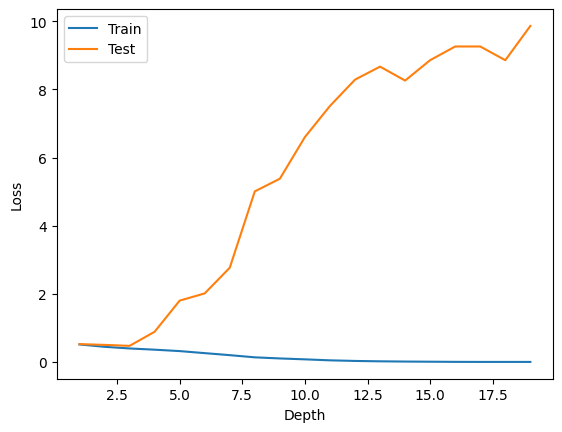

In [118]:
from sklearn.tree import DecisionTreeClassifier

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

Y_predicted_prob = tree_model.predict_proba(X_test)
Y_predicted = tree_model.predict(X_test)
Y_predicted = (Y_predicted > 0.5).astype(int) 
accuracy = accuracy_score(y_test, Y_predicted)
print(f"Accuracy: {accuracy:.4f}")
print(f"Mean abs error: {mean_absolute_error(y_test, Y_predicted):.4f}")
print(f"Mean square error: {mean_squared_error(y_test, Y_predicted):.4f}")
print(f"Log loss: {log_loss(y_test, Y_predicted):.4f}")

depths = range(1, 20)
train_losses, test_losses = [], []
for d in depths:
    tree = DecisionTreeClassifier(max_depth=d)
    tree.fit(X_train, y_train)

    train_pred = tree.predict_proba(X_train)
    test_pred = tree.predict_proba(X_test)

    train_loss = log_loss(y_train, train_pred)
    test_loss = log_loss(y_test, test_pred)

    train_losses.append(train_loss)
    test_losses.append(test_loss)


plt.plot(depths, train_losses, label='Train')
plt.plot(depths, test_losses, label='Test')
plt.ylabel('Loss')
plt.xlabel('Depth')
plt.legend()
plt.show()
    

Выводы: 
 - Судя по графику, максимально эффективная глубина дерева - 3
 - Значения глубины выше 3, судя по всему, <b>переобучают</b> на тестовой выборке, из-за чего train-loss монотонно убывает, в то время как test-loss серьёзно возрастает

#### Модель 4 - XGboost 

Accuracy: 0.8101
Log loss: 0.4763


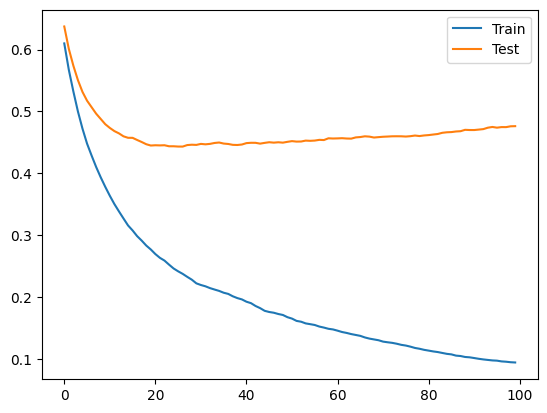

In [119]:
from xgboost import XGBClassifier  

grad_boost_model = XGBClassifier(learning_rate=0.1, )
grad_boost_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

Y_pred_proba = grad_boost_model.predict_proba(X_test)
Y_pred = grad_boost_model.predict(X_test)

accuracy = accuracy_score(y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Log loss: {log_loss(y_test, Y_pred_proba):.4f}")

learn_results=grad_boost_model.evals_result()

plt.plot(learn_results['validation_0']['logloss'], label='Train')
plt.plot(learn_results['validation_1']['logloss'], label='Test')
plt.legend()
plt.show()

Выводы:
 - Несмотря на то, что train-loss убывает по экспоненте, test-loss после определенного этапа растёр, что не есть гуд
 - Впрочем, градиентный бустинг показывает лучше резуьтаты в плане метрик: итоговый Log loss не превысил 0.5 (у двух предыдущих моделей log loss был не ниже 7)

#### Кросс-валидация


In [120]:
from sklearn.model_selection import cross_val_score

# cross_val_score не считает кросс-валидацию для Sequential модели, т.к. Sequential не является sklearn.Estimator
# sequential_score = cross_val_score(Sequential_model, X_test, y_test, cv=8)
linear_score = cross_val_score(linear_model, X_test, y_test, cv=8).mean()
tree_score = cross_val_score(tree_model, X_test, y_test, cv=8).mean()
grad_boost_score = cross_val_score(grad_boost_model, X_test, y_test, cv=8).mean()

print(f"Linear model mean score: {linear_score:.4f}")
print(f"DecisionTreeClassifier model mean score: {tree_score:.4f}")
print(f"XGBClassifier: {grad_boost_score:.4f}")

Linear model mean score: 0.3944
DecisionTreeClassifier model mean score: 0.7599
XGBClassifier: 0.7871


## Выводы 
Модель градиентного бустинга достигла лучших метрик на данной задаче.
Данная модель достойна баллов брс